In [121]:
#流程：對圖片轉成數值(用色階) > 降維 > 拉平 訓練數據
#新的資料進來時，會再對那個心圖片做一樣的事情，然後用模型已算出來的權重去預測該圖是甚麼

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
from keras.datasets import mnist

In [123]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [124]:
x_train[1234].shape
# 但是CNN 要的是 (28, 28, 1)

(28, 28)

In [125]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

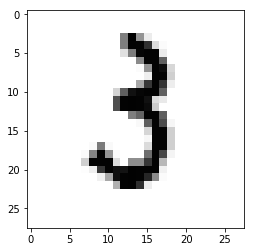

In [126]:
X = x_train[1234]
X = X.reshape(28, 28)
plt.imshow(X,  cmap='Greys')

In [127]:
y_train[1234]

3

In [128]:
from keras.utils import np_utils

In [129]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [130]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [131]:
x_train = x_train/255
x_test = x_test/255

####

* 3 次conv, 3 次max
* 2 Dense
* output 10

filter 大小 3x3
maxpooling 2x2

* conv01: 4
* conv02: 8
* conv03: 16
* 17
* 33

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D 
from keras.optimizers import SGD

In [133]:
model = Sequential()

In [134]:
model.add(Conv2D(4, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [135]:
model.add(MaxPool2D(pool_size=(2,2)))

In [136]:
model.add(Conv2D(8, (3, 3), padding='same',
                activation='relu'))

In [137]:
model.add(MaxPool2D(pool_size=(2,2)))

In [138]:
model.add(Conv2D(16, (3, 3), padding='same',
                activation='relu'))

In [139]:
model.add(MaxPool2D(pool_size=(2,2)))

* 4
* Dense 層

In [140]:
model.add(Flatten())
model.add(Dense(17, activation='relu'))

In [141]:
model.add(Dense(33, activation='relu'))

* 5
* output

In [142]:
model.add(Dense(10, activation='softmax'))

In [143]:
#model.compile(loss="categorical_crossentropy",
#              optimizer=Adadelta(),
#              metrics=['accuracy'])

In [144]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [145]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 144)               0         
__________

## 訓練

In [155]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0253 - acc: 0.8222
Epoch 2/10
60000/60000 [==============================] - 30s 506us/step - loss: 0.0239 - acc: 0.8305
Epoch 3/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.0133 - acc: 0.9137
Epoch 4/10
60000/60000 [==============================] - 31s 515us/step - loss: 0.0111 - acc: 0.9272
Epoch 5/10
60000/60000 [==============================] - 33s 547us/step - loss: 0.0101 - acc: 0.9345
Epoch 6/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.0093 - acc: 0.9392
Epoch 7/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.0088 - acc: 0.9432
Epoch 8/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.0082 - acc: 0.9471
Epoch 9/10
60000/60000 [==============================] - 33s 543us/step - loss: 0.0079 - acc: 0.9482
Epoch 10/10
60000/60000 [==============================] - 33s 544us/step - loss: 

In [156]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 211us/step


In [157]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00676
測試資料的正確率: 0.9556


In [158]:
#存模型
model.save('myCNNmodel.h5')

In [163]:
del model

In [164]:
from keras.models import load_model

In [166]:
model = load_model('myCNNmodel.h5')

In [167]:
predict = model.predict_classes(x_test)

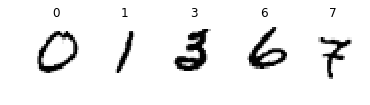

In [168]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")